In [14]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.metrics import mean_absolute_error


In [22]:
# Load data from file
with open('data.pc','rb') as f:
    data = pickle.load(f)
x = data['x']
y = data['y'] # Sampled data (with noise)
y0 = data['y0'] # True data (without noise)
X = np.array([x]).T # make a N x 1 matrix (x is a N vector)¨

array([[-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
        -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
        -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
        -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
        -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
         0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
         0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
         0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
         0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
         0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]])

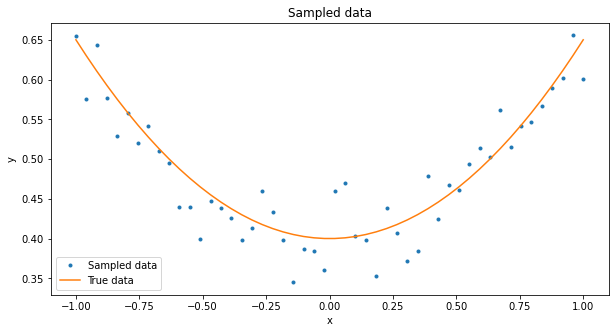

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x,y,'.',label='Sampled data')
ax.plot(x,y0,'-',label='True data')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Sampled data')
plt.show()


In [26]:
def fit_svr_and_plot(epsilon=0.02, C=1):
    # Fit the model
    model = svm.SVR(epsilon=epsilon, C=C)
    model.fit(X, y)
    ypred = model.predict(X)
    error = mean_absolute_error(ypred, y)
    # Fill between ypred-eps and ypred+eps
    plt.fill_between(x,ypred-epsilon,ypred+epsilon,color='blue',alpha=0.1)
    # Plot the support vector points
    for sv_idx in model.support_:
        plt.plot(x[sv_idx],y[sv_idx],markersize=8,marker='o',color='pink')
    # Plot data and model
    plt.plot(x, y0,'--',linewidth=2)
    plt.plot(x, y,'b*')
    plt.plot(x, ypred, 'k',linewidth=2)
    plt.ylim(0.3,0.7)
    plt.title(f'{epsilon = }, {C = } {error = :.3f}')

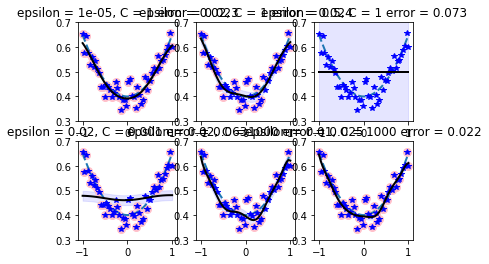

: 

In [27]:
# Run SVR fit function with different pairs of eps and C
i = 1
for eps, C in [(1e-5, 1), (0.02, 1), (0.5, 1), (0.02, 1e-3), (0.02, 1000),
    (0.01, 1000)]:

    plt.subplot(2,3,i)
    fit_svr_and_plot(epsilon=eps, C=C)
    i += 1